In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv("~/projects/us-education-datasets-unification-project/data/us-education-datasets-unification-project/states_all_extended.csv")

In [4]:
df.shape

(1492, 193)

In [5]:
np.sqrt(df.shape[0])
df.shape[0]/50

29.84

In [6]:
df.head(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.398961,260.892247,196.764414,NaN


In [7]:
df.columns.tolist()

['PRIMARY_KEY',
 'STATE',
 'YEAR',
 'ENROLL',
 'TOTAL_REVENUE',
 'FEDERAL_REVENUE',
 'STATE_REVENUE',
 'LOCAL_REVENUE',
 'TOTAL_EXPENDITURE',
 'INSTRUCTION_EXPENDITURE',
 'SUPPORT_SERVICES_EXPENDITURE',
 'OTHER_EXPENDITURE',
 'CAPITAL_OUTLAY_EXPENDITURE',
 'GRADES_PK_G',
 'GRADES_KG_G',
 'GRADES_4_G',
 'GRADES_8_G',
 'GRADES_12_G',
 'GRADES_1_8_G',
 'GRADES_9_12_G',
 'GRADES_ALL_G',
 'GRADES_PK_AM',
 'GRADES_KG_AM',
 'GRADES_4_AM',
 'GRADES_8_AM',
 'GRADES_12_AM',
 'GRADES_1_8_AM',
 'GRADES_9_12_AM',
 'GRADES_ALL_AM',
 'GRADES_PK_AS',
 'GRADES_KG_AS',
 'GRADES_4_AS',
 'GRADES_8_AS',
 'GRADES_12_AS',
 'GRADES_1_8_AS',
 'GRADES_9_12_AS',
 'GRADES_ALL_AS',
 'GRADES_PK_HI',
 'GRADES_KG_HI',
 'GRADES_4_HI',
 'GRADES_8_HI',
 'GRADES_12_HI',
 'GRADES_1_8_HI',
 'GRADES_9_12_HI',
 'GRADES_ALL_HI',
 'GRADES_PK_BL',
 'GRADES_KG_BL',
 'GRADES_4_BL',
 'GRADES_8_BL',
 'GRADES_12_BL',
 'GRADES_1_8_BL',
 'GRADES_9_12_BL',
 'GRADES_ALL_BL',
 'GRADES_PK_WH',
 'GRADES_KG_WH',
 'GRADES_4_WH',
 'GRADES_8_W

In [8]:
df['avg_local_revenue']=df['LOCAL_REVENUE']/df['GRADES_ALL_G']
df['avg_instruction_expenditure'] = df['INSTRUCTION_EXPENDITURE'] / df['GRADES_ALL_G']
df['fracn_schoolage'] = df['ENROLL']/ df['GRADES_ALL_G']

In [9]:
#sns.pairplot(df)

(194, 194)


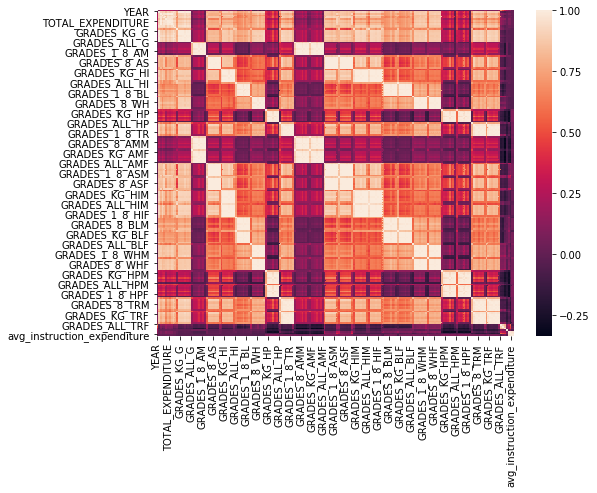

In [10]:
corr = df.corr()
print(corr.shape)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr)

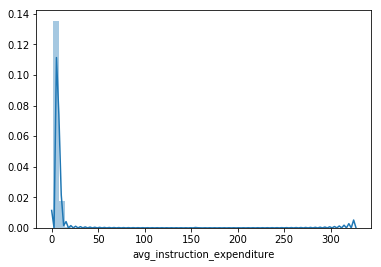

In [11]:
sns.distplot(df['avg_instruction_expenditure'].dropna())

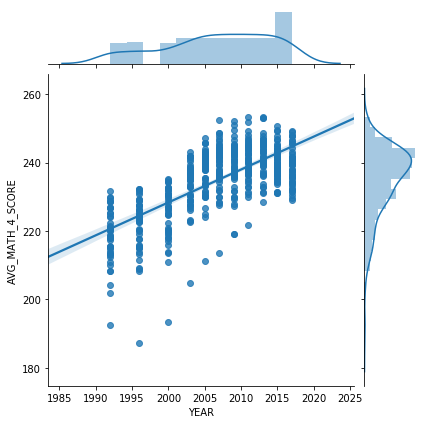

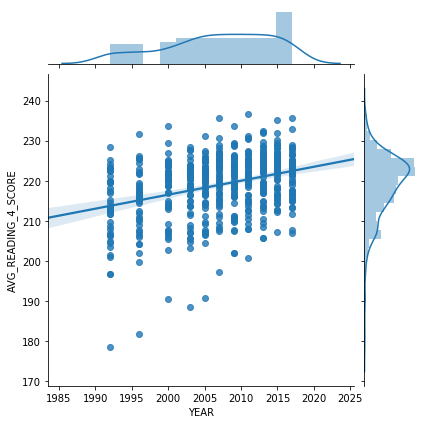

In [12]:
sns.jointplot("YEAR", "AVG_MATH_4_SCORE", data=df, kind="reg")
sns.jointplot("YEAR", "AVG_READING_4_SCORE", data=df, kind="reg")

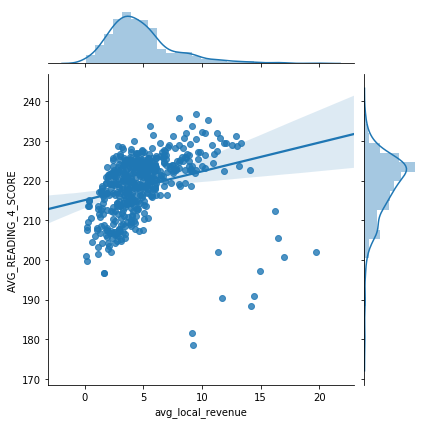

In [13]:
sns.jointplot("avg_local_revenue", "AVG_READING_4_SCORE", data=df, kind="reg")

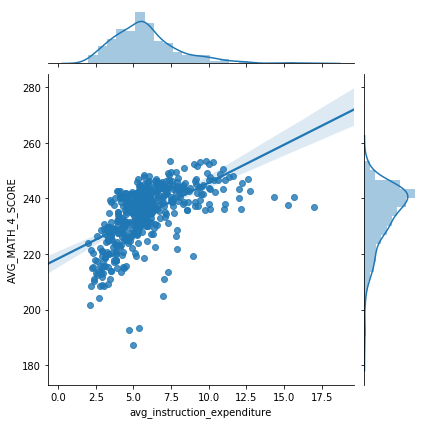

In [14]:
sns.jointplot("avg_instruction_expenditure", "AVG_MATH_4_SCORE", data=df, kind="reg")

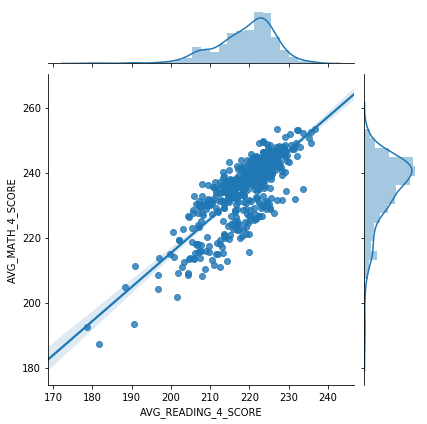

In [15]:
sns.jointplot("AVG_READING_4_SCORE", "AVG_MATH_4_SCORE", data=df, kind="reg")

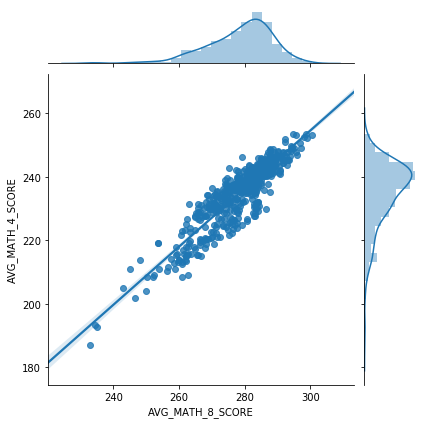

In [16]:
sns.jointplot("AVG_MATH_8_SCORE", "AVG_MATH_4_SCORE", data=df, kind="reg")

In [17]:
df1=df.drop(['PRIMARY_KEY','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE','ENROLL'],axis=1)
df1 = df1.dropna()
df1 = pd.get_dummies(df1, columns=['STATE'])

y=df1.loc[:,'AVG_MATH_4_SCORE'].values
X=df1.drop(['AVG_MATH_4_SCORE'],axis=1).loc[:,:].values

In [18]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X, y)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

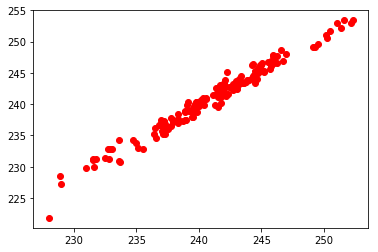

In [19]:
Y_rf=rf_model.predict(X)
plt.plot(Y_rf, y, 'ro')
plt.show()

In [20]:
feature_importances_rf = pd.DataFrame(rf_model.feature_importances_, index = df1.drop(['AVG_MATH_4_SCORE'],axis=1).columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances_rf.head(10)

,importance
avg_instruction_expenditure,0.188954
STATE_MASSACHUSETTS,0.041592
GRADES_12_TRM,0.038304
avg_local_revenue,0.038174
GRADES_12_HPM,0.031493
GRADES_9_12_AMF,0.026366
GRADES_12_HPF,0.025952
GRADES_12_TR,0.023059
STATE_NEW_HAMPSHIRE,0.021609
GRADES_9_12_HPM,0.014092


In [21]:
feature_importances_rf.tail(10)

,importance
STATE_NEW_MEXICO,0.0
STATE_DISTRICT_OF_COLUMBIA,0.0
STATE_TEXAS,0.0
STATE_ARKANSAS,0.0
STATE_NORTH_CAROLINA,0.0
STATE_VIRGINIA,0.0
STATE_WASHINGTON,0.0
STATE_ARIZONA,0.0
STATE_WISCONSIN,0.0
STATE_NEVADA,0.0


In [22]:
from sklearn import svm
svm_model = svm.SVR(gamma='scale')
svm_model.fit(X, y)  

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

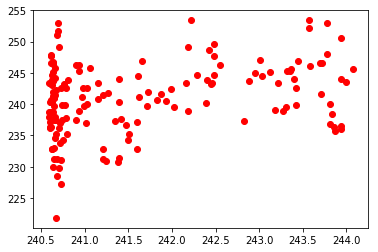

In [23]:
Y_rf=svm_model.predict(X)
plt.plot(Y_rf, y, 'ro')
plt.show()